In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ADMISSIONS.csv")
df.head(5)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

In [4]:
# 1. 총 환자 수
# 중복된 환자 수?
df['row_id'].count()

129

In [5]:
# 2. 평균 입원 시간
temp = pd.to_datetime(df['dischtime']) - pd.to_datetime(df['admittime'])
temp.mean()

Timedelta('9 days 07:58:33.488372093')

In [6]:
# 3. 입원 유형(admission_type)의 종류와 유형별 환자 수
df['admission_type'].value_counts()


EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: admission_type, dtype: int64

In [7]:
# 4. 진단명(diagnosis)의 종류와 진단별 환자 수
df['diagnosis'].value_counts()

SEPSIS                                  10
PNEUMONIA                                8
SHORTNESS OF BREATH                      4
FEVER                                    4
CONGESTIVE HEART FAILURE                 3
                                        ..
SEPSIS;TELEMETRY                         1
HYPOTENSION;TELEMETRY                    1
CRITICAL AORTIC STENOSIS/HYPOTENSION     1
OVERDOSE                                 1
CHOLANGITIS                              1
Name: diagnosis, Length: 95, dtype: int64

In [15]:
def show_piechart(column):
    labels = [m for m in set(df[column])]
    values = [j for j in df[column].value_counts()]
    print(labels)
    print(values)
    plt.pie(values, labels=labels)
    plt.show


['CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'OTHER', 'CATHOLIC', 'PROTESTANT QUAKER', 'CATHOLIC', 'CATHOLIC', 'NOT SPECIFIED', 'JEWISH', 'CATHOLIC', 'UNOBTAINABLE', 'UNOBTAINABLE', 'CATHOLIC', 'UNOBTAINABLE', 'PROTESTANT QUAKER', 'CATHOLIC', 'CHRISTIAN SCIENTIST', 'CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'UNOBTAINABLE', 'CATHOLIC', 'UNOBTAINABLE', nan, 'OTHER', 'NOT SPECIFIED', 'CATHOLIC', 'UNOBTAINABLE', 'UNOBTAINABLE', 'UNOBTAINABLE', 'UNOBTAINABLE', 'NOT SPECIFIED', 'UNOBTAINABLE', 'UNOBTAINABLE', 'UNOBTAINABLE', 'UNOBTAINABLE', 'NOT SPECIFIED', 'CATHOLIC', 'BUDDHIST', 'CATHOLIC', 'CATHOLIC', 'PROTESTANT QUAKER', 'PROTESTANT QUAKER', 'CATHOLIC', 'CATHOLIC', 'NOT SPECIFIED', 'NOT SPECIFIED', 'OTHER', 'JEWISH', 'JEWISH', 'UNOBTAINABLE', 'NOT SPECIFIED', 'CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'CHRISTIAN SCIENTIST', 'NOT SPECIFIED', 'PROTESTANT QUAKER', 'PROTESTANT QUAKER', 'CATHOLIC', 'CATHOLIC', 'CATHOLIC', 'UNOBTAINABLE', 'JEWISH', 'PROTESTANT QUAKER'

ValueError: 'label' must be of length 'x'

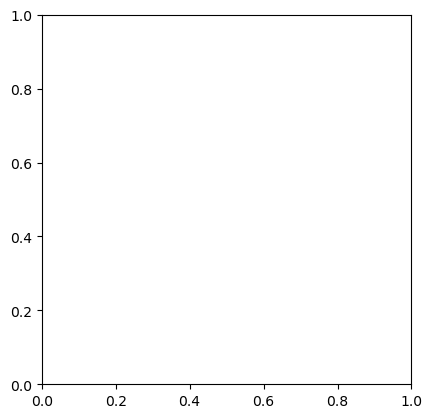

In [16]:
show_piechart('religion')